In [67]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt

# this allows plots to appear directly in the notebook
%matplotlib inline

In [68]:
# load data into dataframe
df = pd.read_csv("emissions.csv", header=0)

In [69]:
# number of rows and columns
df.shape

(45511, 23)

In [70]:
# print first rows
df.head()

,file,year,manufacturer,model,description,euro_standard,transmission,transmission_type,engine_capacity,fuel_type,...,urban_imperial,extra_urban_imperial,combined_imperial,noise_level,co2,thc_emissions,co_emissions,nox_emissions,thc_nox_emissions,particulates_emissions
0,DatapartC_july2000.csv,2000,Alfa Romeo,145 Range,1.6 Twin Spark 16v,2,M5,Manual,1598.0,Petrol,...,25.4,43.5,34.4,74.0,195,NaN,980.0,NaN,NaN,NaN
1,DatapartC_july2000.csv,2000,Alfa Romeo,145 Range,1.8 Twin Spark 16v,2,M5,Manual,1747.0,Petrol,...,24.6,42.8,33.6,74.0,200,NaN,1105.0,NaN,NaN,NaN
2,DatapartC_july2000.csv,2000,Alfa Romeo,145 Range,Cloverleaf,2,M5,Manual,1970.0,Petrol,...,22.8,42.8,32.1,74.0,210,NaN,1103.0,NaN,NaN,NaN
3,DatapartC_july2000.csv,2000,Alfa Romeo,146 Range,1.6 Twin Spark 16v,2,M5,Manual,1598.0,Petrol,...,25.0,42.8,34.0,73.0,195,NaN,980.0,NaN,NaN,NaN
4,DatapartC_july2000.csv,2000,Alfa Romeo,146 Range,1.8 Twin Spark 16v,2,M5,Manual,1747.0,Petrol,...,24.6,42.8,33.6,74.0,200,NaN,1105.0,NaN,NaN,NaN


In [71]:
# basic information
df.describe()

,year,euro_standard,engine_capacity,urban_metric,extra_urban_metric,combined_metric,urban_imperial,extra_urban_imperial,combined_imperial,noise_level,co2,thc_emissions,co_emissions,nox_emissions,thc_nox_emissions,particulates_emissions
count,45511.000000,45511.000000,45504.000000,45498.000000,45498.000000,45504.000000,45498.000000,45498.000000,45504.000000,45502.000000,45511.000000,23190.000000,45192.000000,40150.000000,5430.000000,14801.000000
mean,2007.316055,3.969282,2182.770526,10.472676,6.139602,7.721963,30.527557,49.139714,40.048475,72.141437,189.592846,62.526498,375.084962,127.164387,171.675235,3.312089
std,3.832559,0.838025,899.100669,3.984944,1.783382,2.503880,10.623745,12.189658,11.869572,1.825107,56.993217,33.425421,1048.920760,1189.748216,35.786659,12.678128
min,2000.000000,2.000000,209.000000,3.100000,2.900000,1.200000,6.800000,5.400000,5.900000,0.200000,0.000000,1.000000,-200.000000,0.250000,0.290000,0.000000
25%,2004.000000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,NaN,NaN,NaN,NaN,NaN
50%,2008.000000,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,180.000000,NaN,NaN,NaN,NaN,NaN
75%,2011.000000,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,218.000000,NaN,NaN,NaN,NaN,NaN
max,2013.000000,6.000000,8285.000000,41.200000,97.900000,44.000000,91.100000,97.400000,235.400000,83.000000,590.000000,600.000000,75000.000000,237000.000000,332.000000,396.000000


In [72]:
# number of observation for each parameters
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45511 entries, 0 to 45510
Data columns (total 23 columns):
file                      45511 non-null object
year                      45511 non-null int64
manufacturer              45511 non-null object
model                     45511 non-null object
description               45511 non-null object
euro_standard             45511 non-null int64
transmission              45501 non-null object
transmission_type         45170 non-null object
engine_capacity           45504 non-null float64
fuel_type                 45511 non-null object
urban_metric              45498 non-null float64
extra_urban_metric        45498 non-null float64
combined_metric           45504 non-null float64
urban_imperial            45498 non-null float64
extra_urban_imperial      45498 non-null float64
combined_imperial         45504 non-null float64
noise_level               45502 non-null float64
co2                       45511 non-null int64
thc_emissions         

In [73]:
# accessing element
df.iloc[1, 3]

'145 Range'

In [74]:
# accessing rows
df.loc[0]

file                      DatapartC_july2000.csv
year                                        2000
manufacturer                          Alfa Romeo
model                                  145 Range
description                   1.6 Twin Spark 16v
euro_standard                                  2
transmission                                  M5
transmission_type                         Manual
engine_capacity                             1598
fuel_type                                 Petrol
urban_metric                                11.1
extra_urban_metric                           6.5
combined_metric                              8.2
urban_imperial                              25.4
extra_urban_imperial                        43.5
combined_imperial                           34.4
noise_level                                   74
co2                                          195
thc_emissions                                NaN
co_emissions                                 980
nox_emissions       

In [75]:
# accessing columns
df['noise_level']

0        74.0
1        74.0
2        74.0
3        73.0
4        74.0
5        74.0
6        74.0
7        74.0
8        73.5
9        73.5
10       74.0
11       74.0
12       71.0
13       74.0
14       74.0
15       73.5
16       73.5
17       74.0
18       74.0
19       71.0
20       73.5
21       73.0
22       72.0
23       72.0
24       74.0
25       75.0
26       74.0
27       74.0
28       74.0
29       75.0
         ... 
45481    74.0
45482    74.0
45483    72.0
45484    74.0
45485    74.0
45486    74.0
45487    72.0
45488    72.0
45489    74.0
45490    74.0
45491    74.0
45492    72.0
45493    66.0
45494    68.0
45495    70.0
45496    70.0
45497    74.0
45498    73.0
45499    74.0
45500    73.0
45501    73.0
45502    75.0
45503    69.0
45504    73.0
45505    74.0
45506    74.0
45507    72.0
45508    72.0
45509    74.0
45510    74.0
Name: noise_level, dtype: float64

In [76]:
# filter in a column
df.manufacturer[df['manufacturer'] == 'Lamborghini']
df['noise_level'][df['noise_level'] < 60]
df['model'][df['extra_urban_metric'] > 30]
df['extra_urban_metric'][(df['extra_urban_metric'] < 30) & (df['model'] == 'Omega - Model Year 2003')]

8544     7.7
8545     7.1
8546     7.9
8547     7.3
8548     5.6
8549     5.7
8550     8.6
8551     8.3
8552     8.7
8553     8.5
8554     8.9
8555     7.8
8556     9.0
11626    7.7
11627    7.1
11628    7.9
11629    7.3
11630    5.6
11631    5.7
11632    8.6
11633    8.3
11634    8.7
11635    8.5
11636    7.8
11637    9.0
11638    8.9
Name: extra_urban_metric, dtype: float64

In [77]:
# filter column by string which contains the word 'sunroof'
df[df['description'].str.contains('sunroof')]

,file,year,manufacturer,model,description,euro_standard,transmission,transmission_type,engine_capacity,fuel_type,...,urban_imperial,extra_urban_imperial,combined_imperial,noise_level,co2,thc_emissions,co_emissions,nox_emissions,thc_nox_emissions,particulates_emissions
14230,Part_B_Euro_III_may2005.csv,2005,Renault,Espace,1.9 dCi (JK0GB6)(w/sunroof),3,M6,Manual,1870.0,Diesel,...,31.8,47.1,40.4,72.0,187,NaN,337.0,694.0,NaN,68.000
14232,Part_A_Euro_IV_may2005.csv,2005,Renault,Espace,2.0 16V 140 (JK0KB6)(w/sunroof),4,M6,Manual,1998.0,Petrol,...,22.1,36.3,29.5,70.8,229,NaN,827.0,65.0,NaN,NaN
14234,Part_B_Euro_III_may2005.csv,2005,Renault,Espace,2.0T 16V 165 (JK0BB6)(w/sunroof),3,M6,Manual,1998.0,Petrol,...,21.9,35.8,29.2,70.8,232,NaN,722.0,37.0,NaN,NaN
14236,Part_B_Euro_III_may2005.csv,2005,Renault,Espace,2.0T 16V 165 Auto (JK0BB6)(w/sunroof),3,A5,Automatic,1998.0,Petrol,...,18.5,34.9,26.4,67.6,251,NaN,880.0,44.0,NaN,NaN
14238,Part_B_Euro_III_may2005.csv,2005,Renault,Espace,2.2 dCi (JK0HB6)(w/sunroof),3,M6,Manual,2188.0,Diesel,...,26.9,43.5,35.8,70.9,211,NaN,288.0,594.0,NaN,65.000
14240,Part_B_Euro_III_may2005.csv,2005,Renault,Espace,2.2 dCi Auto From VIN JK0HBB(w/sunroof),3,A5,Automatic,2188.0,Diesel,...,23.5,37.7,31.0,69.9,244,NaN,112.0,591.0,NaN,65.000
14241,Part_B_Euro_III_may2005.csv,2005,Renault,Espace,3.0 dCi Auto (JK0JA/BB)(w/w.o sunroof),3,A5,Automatic,2958.0,Diesel,...,21.2,38.2,29.7,70.6,252,NaN,427.0,475.0,NaN,68.000
14243,Part_B_Euro_III_may2005.csv,2005,Renault,Espace,3.5 V6 24V Auto (JK0FBB)(w/sunroof),3,A5,Automatic,3498.0,Petrol,...,16.2,29.8,22.8,71.0,297,NaN,462.0,67.0,NaN,NaN
14245,Part_B_Euro_III_may2005.csv,2005,Renault,Grand Espace,2.0T 16V 165 (JK0BD6)(w/sunroof),3,M6,Manual,1998.0,Petrol,...,21.9,35.8,29.1,70.8,232,NaN,722.0,37.0,NaN,NaN
14247,Part_B_Euro_III_may2005.csv,2005,Renault,Grand Espace,2.0T 16V Auto (JK0BDB)(w/sunroof),3,A6,Automatic,1999.0,Petrol,...,18.2,34.0,25.9,67.6,255,NaN,880.0,44.0,NaN,NaN


In [78]:
# most common value (mode)
df['manufacturer'].mode()

0    Mercedes-Benz
dtype: object

In [79]:
# mean value
df['engine_capacity'].mean()

2182.7705256680733

In [80]:
# median
df['engine_capacity'].median()

1988.0

In [81]:
# unique values
df['manufacturer'].unique()

array(['Alfa Romeo', 'Aston Martin Lagonda', 'Audi', 'BMW', 'Cadillac',
       'Chevrolet', 'Chrysler Jeep', 'Citroen', 'Daewoo Cars', 'Daihatsu',
       'Ferrari', 'Fiat', 'Ford', 'Honda', 'Hyundai', 'Isuzu',
       'Jaguar Cars', 'Kia', 'Lamborghini', 'Land Rover', 'Lexus', 'Lotus',
       'LTI', 'Maserati', 'Mazda', 'Mercedes-Benz', 'Metrocab',
       'Micro Compact Car', 'Mitsubishi', 'Nissan', 'Perodua', 'Peugeot',
       'Porsche', 'Proton', 'Renault', 'Rolls-Royce',
       'Rover Group Limited', 'Saab', 'Seat', 'Skoda', 'Subaru', 'Suzuki',
       'Tata', 'Toyota', 'Vauxhall', 'Volkswagen', 'Volvo',
       'MG Rover Group', 'Mini', 'Morgan Motor Company', 'Bentley Motors',
       'Smart', 'SsangYong', 'Corvette', 'Dodge', 'Hummer', 'Abarth',
       'Infiniti', 'MG Motors Uk', 'McLaren', 'Dacia', 'MG Motors UK'], dtype=object)

In [82]:
# count number of observations
df['manufacturer'].count()

45511

In [83]:
# count number of of observations of each type (frequency table)
df['manufacturer'].value_counts(ascending=True)

MG Motors UK               5
Tata                       7
MG Motors Uk               8
McLaren                    8
Dacia                      9
Hummer                    10
Abarth                    19
Metrocab                  22
LTI                       30
Infiniti                  47
Isuzu                     52
Corvette                  52
Morgan Motor Company      55
Rover Group Limited       59
Perodua                   61
Dodge                     63
Rolls-Royce               67
Ferrari                   81
Micro Compact Car         85
Maserati                  87
Lotus                     89
Bentley Motors            96
Lamborghini              103
Aston Martin Lagonda     126
Daewoo Cars              156
SsangYong                168
Daihatsu                 169
Lexus                    170
Cadillac                 172
Proton                   259
                        ... 
Mini                     371
Chevrolet                443
Jaguar Cars              453
Alfa Romeo    

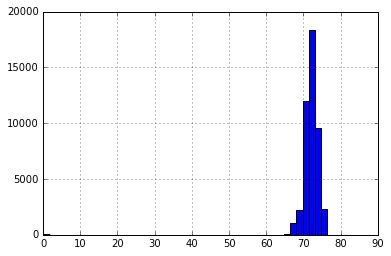

In [84]:
# plot histogram
df['noise_level'].hist(bins=50)

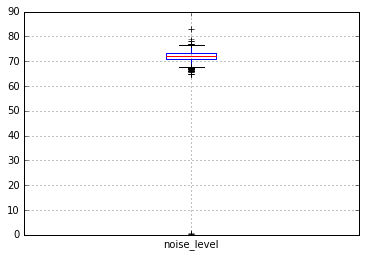

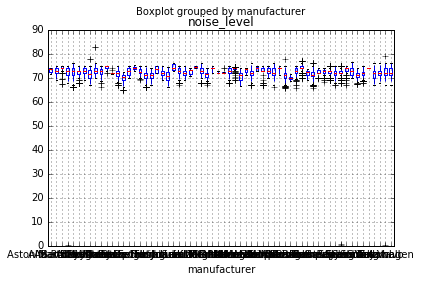

In [85]:
# plot box plot
df.boxplot(column='noise_level', return_type='axes')
df.boxplot(column='noise_level', by = 'manufacturer')

In [86]:
# identify outlier data (filter) thanks to the histogram above
df['noise_level'][df['noise_level'] < 60]

# remove outlier data
df = df[df['noise_level'] > 60]

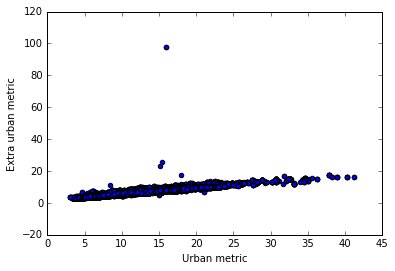

In [87]:
# plot scatter plot
plt.scatter(df['urban_metric'], df['extra_urban_metric'])
plt.xlabel('Urban metric')
plt.ylabel('Extra urban metric')

In [88]:
# concatenate columns into a new dataframe
df2 = pd.concat([df['urban_metric'], df['extra_urban_metric'], df['combined_metric']], axis=1)

In [89]:
# compute mean value of noise level for each manufacturer and sort them in ascending order
df.pivot_table(values='noise_level', index=['manufacturer'], aggfunc=lambda x: x.mean()).sort_values()

manufacturer
Perodua                 69.791803
Daihatsu                69.919527
Mazda                   70.584882
Infiniti                70.721277
Honda                   70.902619
Ford                    70.949657
Nissan                  71.109309
Subaru                  71.194454
Lexus                   71.208824
Toyota                  71.448387
Chevrolet               71.509707
Renault                 71.540973
Daewoo Cars             71.603205
Suzuki                  71.661959
Bentley Motors          71.880208
Seat                    71.942958
Proton                  71.971042
Hyundai                 72.067395
Kia                     72.078641
Volkswagen              72.148831
Volvo                   72.167197
Mitsubishi              72.175489
MG Motors UK            72.200000
Mercedes-Benz           72.240439
Micro Compact Car       72.247059
Dacia                   72.277778
BMW                     72.295957
Skoda                   72.326203
Rolls-Royce             72.382090
R

In [90]:
# same using groupby
grouped_data = df.groupby('manufacturer')
grouped_data['noise_level'].mean().sort_values()

manufacturer
Perodua                 69.791803
Daihatsu                69.919527
Mazda                   70.584882
Infiniti                70.721277
Honda                   70.902619
Ford                    70.949657
Nissan                  71.109309
Subaru                  71.194454
Lexus                   71.208824
Toyota                  71.448387
Chevrolet               71.509707
Renault                 71.540973
Daewoo Cars             71.603205
Suzuki                  71.661959
Bentley Motors          71.880208
Seat                    71.942958
Proton                  71.971042
Hyundai                 72.067395
Kia                     72.078641
Volkswagen              72.148831
Volvo                   72.167197
Mitsubishi              72.175489
MG Motors UK            72.200000
Mercedes-Benz           72.240439
Micro Compact Car       72.247059
Dacia                   72.277778
BMW                     72.295957
Skoda                   72.326203
Rolls-Royce             72.382090
R

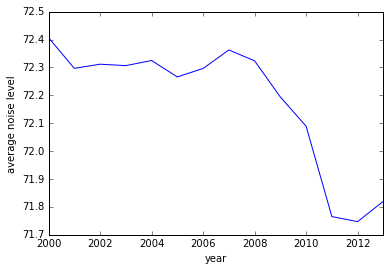

In [91]:
# relationship between 2 numerical variables
grouped_data = df.groupby('year')
grouped_data['noise_level'].mean().plot()
plt.ylabel('average noise level')

In [92]:
# drop un-insightful columns
df = df.drop(['file', 'particulates_emissions'], axis=1)

In [93]:
# find number of null values in a column
df['thc_nox_emissions'].isnull().sum()

40068

In [94]:
# find maximum
df['noise_level'].max()

83.0

In [95]:
# find minimum
df['noise_level'].min()

65.0

In [96]:
# find index of maximum
df['noise_level'].argmax()

34525

In [97]:
# find index of minimum
df['noise_level'].argmin()

2166

In [98]:
# applymap: for loop for the whole data frame
grades_df = pd.DataFrame(
    data={'exam1': [43, 81, 78, 75, 89, 70, 91, 65, 98, 87],
          'exam2': [24, 63, 56, 56, 67, 51, 79, 46, 72, 60]},
    index=['Andre', 'Barry', 'Chris', 'Dan', 'Emilio', 
           'Fred', 'Greta', 'Humbert', 'Ivan', 'James']
)

def convert(grade):
    if grade >= 90 and grade <= 100:
        x = 'A'
    elif grade >= 80 and grade <= 89:
        x = 'B'
    elif grade >= 70 and grade <= 79:
        x = 'C'
    elif grade >= 60 and grade <= 69:
        x = 'D'
    elif grade >= 0 and grade <= 59:
        x = 'F'

    return x

grades_df.applymap(convert)

,exam1,exam2
Andre,F,F
Barry,B,D
Chris,C,F
Dan,C,F
Emilio,B,D
Fred,C,F
Greta,A,C
Humbert,D,F
Ivan,A,C
James,B,D


In [99]:
# apply: for loop for a data frame column (or pandas series)

names = pd.Series([
    'Andre Agassi',
    'Barry Bonds',
    'Christopher Columbus',
    'Daniel Defoe',
    'Emilio Estevez',
    'Fred Flintstone',
    'Greta Garbo',
    'Humbert Humbert',
    'Ivan Ilych',
    'James Joyce',
    'Keira Knightley',
    'Lois Lane',
    'Mike Myers',
    'Nick Nolte',
    'Ozzy Osbourne',
    'Pablo Picasso',
    'Quirinus Quirrell',
    'Rachael Ray',
    'Susan Sarandon',
    'Tina Turner',
    'Ugueth Urbina',
    'Vince Vaughn',
    'Woodrow Wilson',
    'Yoji Yamada',
    'Zinedine Zidane'
])


def reverse_name(name):
        split_name = name.split()
        return split_name[1]+', '+split_name[0]
        
names.apply(reverse_name)

0             Agassi, Andre
1              Bonds, Barry
2     Columbus, Christopher
3             Defoe, Daniel
4           Estevez, Emilio
5          Flintstone, Fred
6              Garbo, Greta
7          Humbert, Humbert
8               Ilych, Ivan
9              Joyce, James
10         Knightley, Keira
11               Lane, Lois
12              Myers, Mike
13              Nolte, Nick
14           Osbourne, Ozzy
15           Picasso, Pablo
16       Quirrell, Quirinus
17             Ray, Rachael
18          Sarandon, Susan
19             Turner, Tina
20           Urbina, Ugueth
21            Vaughn, Vince
22          Wilson, Woodrow
23             Yamada, Yoji
24         Zidane, Zinedine
dtype: object

In [100]:
# standardize column
grades_df = pd.DataFrame(
    data={'exam1': [43, 81, 78, 75, 89, 70, 91, 65, 98, 87],
          'exam2': [24, 63, 56, 56, 67, 51, 79, 46, 72, 60]},
    index=['Andre', 'Barry', 'Chris', 'Dan', 'Emilio', 
           'Fred', 'Greta', 'Humbert', 'Ivan', 'James']
)

def standardise_column(column):
    return (column - column.mean()) / column.std(ddof=0)